In [16]:
# import needed columns 

import os
import json
import pandas as pd
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
### read in non-nested json 

# Create an empty list to store DataFrames & put path to main folder 
dfs = []
main_folder = "/Users/janabernhard/Documents/Projekte/2023_Embedding/validation/evaluation_results 2/semantic_syntactic"


# Iterate through the subfolders
subfolders = ['bestmatch', 'mostsimilar', 'opposite', 'wordintrusion']
for subfolder in subfolders:
    subfolder_path = os.path.join(main_folder, subfolder)

    # If the subfolder is 'mostsimilar', further iterate through sub-subfolders
    if subfolder == 'mostsimilar':
        subsubfolders = os.listdir(subfolder_path)
        for subsubfolder in subsubfolders:
            subsubfolder_path = os.path.join(subfolder_path, subsubfolder)
            if os.path.isdir(subsubfolder_path):
                for file in os.listdir(subsubfolder_path):
                    if file.endswith(".json"):
                        with open(os.path.join(subsubfolder_path, file), 'r') as json_file:
                            data = json.load(json_file)
                            #model_name = data.get("name", f"{subfolder}_{subsubfolder}")
                            df = pd.json_normalize(data, max_level=1)  # Expand the JSON data
                            #df["Model"] = model_name
                            dfs.append(df)
    else:
        for file in os.listdir(subfolder_path):
            if file.endswith(".json"):
                with open(os.path.join(subfolder_path, file), 'r') as json_file:
                    data = json.load(json_file)
                    #model_name = data.get("name", f"{subfolder}")
                    df = pd.json_normalize(data, max_level=1)  # Expand the JSON data
                    #df["Model"] = model_name
                    dfs.append(df)

# Concatenate all DataFrames into one
final_df = pd.concat(dfs, ignore_index=True)

### ATTENTION: This does not work for the nested subfolder, so we will add that later 


In [19]:
## the name "pfiffiger_dylan" was put for two models, so we will change that. 
# to check:
# print(final_df.name.value_counts())

# to see where we need to replace the name:
# print(final_df.loc[final_df['name'] == 'pfiffiger_dylan'])

final_df.loc[183, 'name'] = 'doppeltes_model'
final_df.loc[374, 'name'] = 'doppeltes_model'
final_df.loc[790, 'name'] = 'doppeltes_model'

# for testing:
# final_df.name.value_counts()


In [20]:
### Adding the missing subfolder 

# Specify the directory where your JSON files are located.
directory = '/Users/janabernhard/Documents/Projekte/2023_Embedding/validation/evaluation_results 2/semantic_syntactic/mostsimilar'

# List all JSON files in the directory.
json_files = [f for f in os.listdir(directory) if f.endswith('.json')]

# Create an empty list to store DataFrames.
dataframes = []

# Loop through the JSON files and read them into DataFrames.
for json_file in json_files:
    file_path = os.path.join(directory, json_file)
    data = pd.read_json(file_path)
    dataframes.append(data)

# Concatenate all DataFrames into one.
combined_df = pd.concat(dataframes, ignore_index=True)

# Now, combined_df contains the data from all JSON files in your folder.
combined_df

,task_group,task,correct,top_n,n,coverage,total_questions,duration,name,parameter_string
0,most_similar_groups,nouns: SI/PL,126,307,10,500,500,2.525968,stilvoller_erich,training_data_lower_cbow_lr0.05_epochs1_mincou...
1,most_similar_groups,nouns: PL/SI,78,231,10,500,500,2.330075,stilvoller_erich,training_data_lower_cbow_lr0.05_epochs1_mincou...
2,most_similar_groups,adjectives: GR/KOM,286,402,10,472,500,2.588951,stilvoller_erich,training_data_lower_cbow_lr0.05_epochs1_mincou...
3,most_similar_groups,adjectives: KOM/GR,201,380,10,486,500,2.504584,stilvoller_erich,training_data_lower_cbow_lr0.05_epochs1_mincou...
4,most_similar_groups,adjectives: GR/SUP,205,265,10,296,500,2.748312,stilvoller_erich,training_data_lower_cbow_lr0.05_epochs1_mincou...
...,...,...,...,...,...,...,...,...,...,...
6715,most_similar_groups,verbs (past): INF/3PV,353,460,10,500,500,2.356588,lebendiger_harry,training_data_cbow_lr0.05_epochs1_mincount100_...
6716,most_similar_groups,verbs (past): 3PV/INF,378,452,10,500,500,2.662428,lebendiger_harry,training_data_cbow_lr0.05_epochs1_mincount100_...
6717,most_similar_groups,verbs (past): 3SV/3PV,486,500,10,500,500,2.422711,lebendiger_harry,training_data_cbow_lr0.05_epochs1_mincount100_...
6718,most_similar_groups,verbs (past): 3PV/3SV,447,500,10,500,500,2.529326,lebendiger_harry,training_data_cbow_lr0.05_epochs1_mincount100_...


In [21]:
## the name "pfiffiger_dylan" was put for two models again, so we will change that. 
# to check:
# print(final_df.name.value_counts())

# to see where we need to replace the name:
# print(final_df.loc[final_df['name'] == 'pfiffiger_dylan'])

for i in range(273,294,1):
    combined_df.loc[i, 'name'] = 'doppeltes_model'

# for testing:
# final_df.name.value_counts()

In [22]:
### also we only need the total score, not all the subgroups 
combined_df = combined_df[combined_df['task']=='total']



In [23]:
### we add these to our final_df
final_df = pd.concat([final_df, combined_df], ignore_index=True)
final_df = final_df.reset_index()

In [24]:
# Calculate the required values by grouping and aggregating
aggregated_df = final_df.groupby(['name', 'task'])[['correct', 'coverage']].sum()
aggregated_df['result'] = (aggregated_df['correct'] / aggregated_df['coverage']) * 100

# Pivot the aggregated DataFrame
pivot_df = aggregated_df.pivot_table(index='name', columns='task', values='result').reset_index()

# Rename columns
pivot_df.columns.name = None

# Reset the index
pivot_df.reset_index(drop=True, inplace=True)

# Round the numeric columns to two decimal places
pivot_df = pivot_df.round(2)

# Add the 'parameter_string' column to the resulting DataFrame
pivot_df['parameter_string'] = final_df['parameter_string'].iloc[::4].values

# Rename columns 
pivot_df = pivot_df.rename(columns={'best match': 'bestmatch', 'opposite': 'opposite', 'doesnt fit': 'wordintrusion', 'total':'syntactic'})

In [25]:
### extract more info from parameter strings in case we need it 

pivot_df['windows'] = pivot_df['parameter_string'].str.extract(r'ws(\d+)').astype(int)
pivot_df['mincount'] = pivot_df['parameter_string'].str.extract(r'mincount(\d+)').astype(int)
pivot_df['lower'] = pivot_df['parameter_string'].str.contains('lower')


        Column 1       Column 2  Correlation  Significance
0      bestmatch  wordintrusion     0.592282  1.106028e-31
1      bestmatch       opposite     0.674859  7.105514e-44
2      bestmatch      syntactic     0.530399  1.291844e-24
3  wordintrusion       opposite     0.415776  8.308357e-15
4  wordintrusion      syntactic     0.248095  7.085779e-06
5       opposite      syntactic     0.838815  5.654102e-86


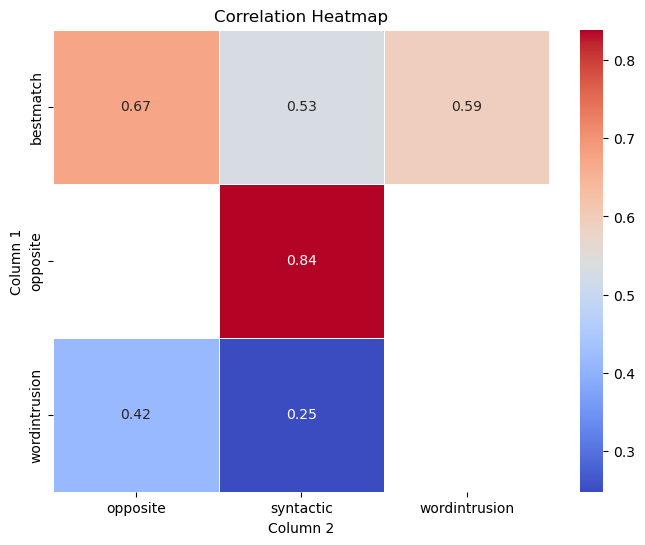

In [27]:
#### see if they correlate 
columns_to_check = ["bestmatch", "wordintrusion", "opposite", "syntactic"]

correlation_results = []

for i in range(len(columns_to_check)):
    for j in range(i+1, len(columns_to_check)):
        col1 = columns_to_check[i]
        col2 = columns_to_check[j]
        correlation, p_value = pearsonr(pivot_df[col1], pivot_df[col2])
        correlation_results.append({
            "Column 1": col1,
            "Column 2": col2,
            "Correlation": correlation,
            "Significance": p_value
        })

result_df = pd.DataFrame(correlation_results)
print(result_df)

# Create a pivot table for the heatmap
pivot_table = result_df.pivot(index="Column 1", columns="Column 2", values="Correlation")

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
### check subgroup differences 

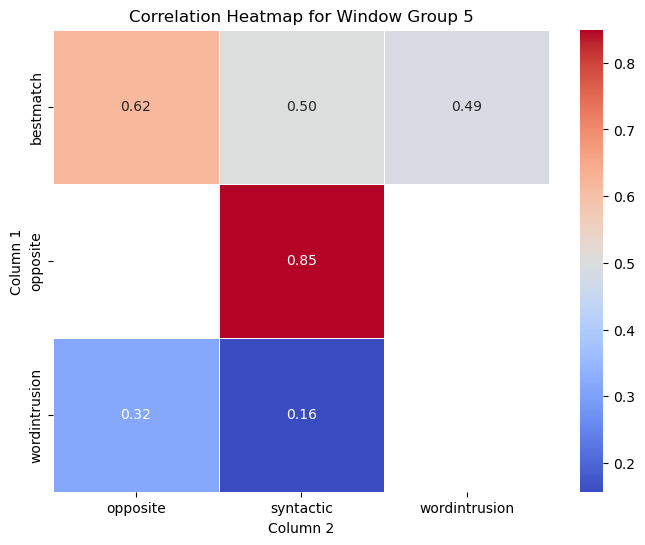

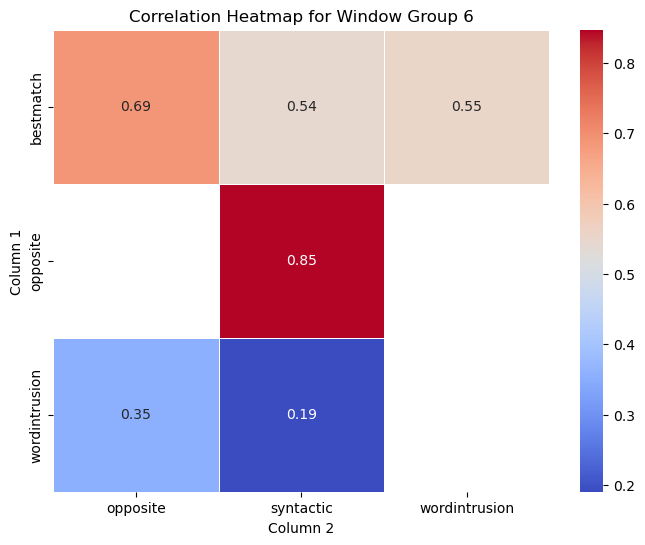

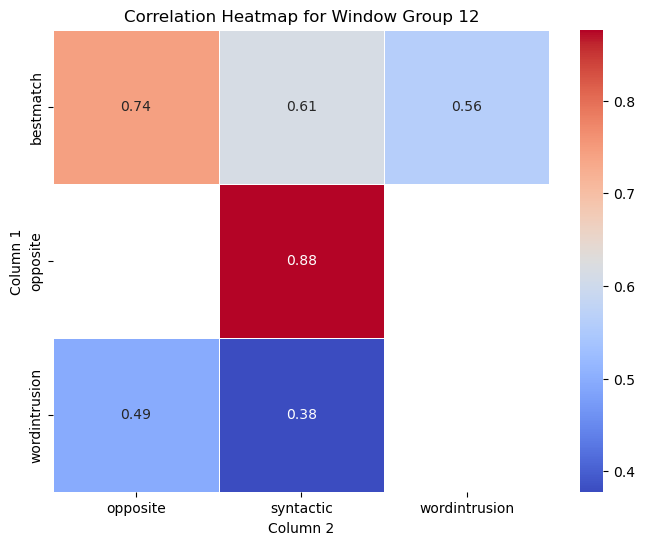

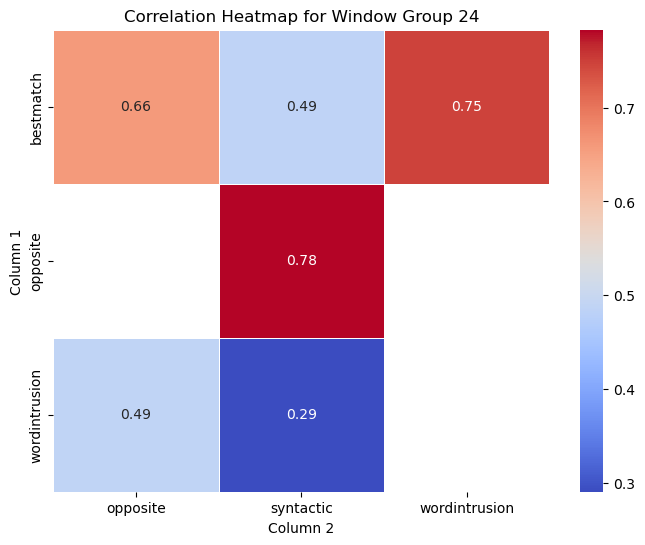

In [30]:
# Group the pivot_df by the "windows" column
grouped = pivot_df.groupby("windows")

# Create a separate heatmap for each group
for group_name, group_df in grouped:
    correlation_results = []

    for i in range(len(columns_to_check)):
        for j in range(i + 1, len(columns_to_check)):
            col1 = columns_to_check[i]
            col2 = columns_to_check[j]
            correlation, p_value = pearsonr(group_df[col1], group_df[col2])
            correlation_results.append({
                "Column 1": col1,
                "Column 2": col2,
                "Correlation": correlation,
                "Significance": p_value
            })

    result_df = pd.DataFrame(correlation_results)

    # Create a pivot table for the heatmap
    pivot_table = result_df.pivot(index="Column 1", columns="Column 2", values="Correlation")

    # Create a heatmap for the current group
    plt.figure(figsize=(8, 6))
    sns.heatmap(pivot_table, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title(f"Correlation Heatmap for Window Group {group_name}")
    plt.show()


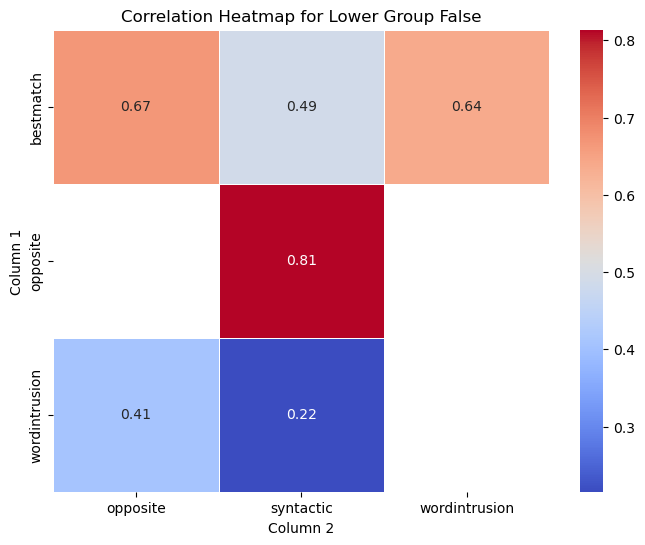

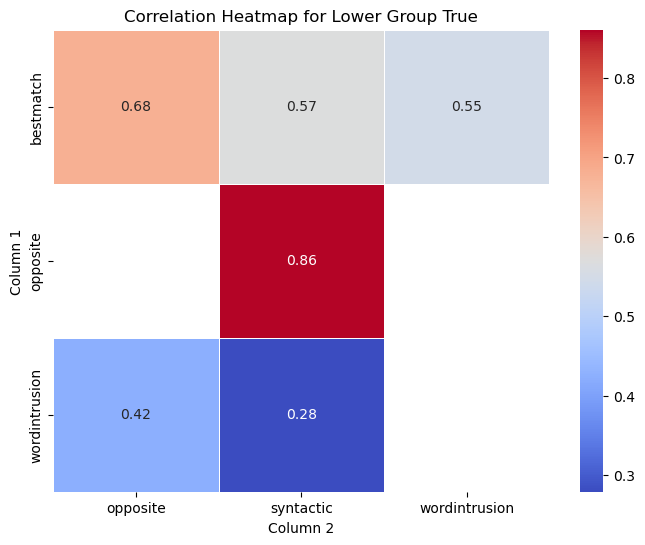

In [31]:
# Group the pivot_df by the "lower" column
grouped = pivot_df.groupby("lower")

# Create a separate heatmap for each group
for group_name, group_df in grouped:
    correlation_results = []

    for i in range(len(columns_to_check)):
        for j in range(i + 1, len(columns_to_check)):
            col1 = columns_to_check[i]
            col2 = columns_to_check[j]
            correlation, p_value = pearsonr(group_df[col1], group_df[col2])
            correlation_results.append({
                "Column 1": col1,
                "Column 2": col2,
                "Correlation": correlation,
                "Significance": p_value
            })

    result_df = pd.DataFrame(correlation_results)

    # Create a pivot table for the heatmap
    pivot_table = result_df.pivot(index="Column 1", columns="Column 2", values="Correlation")

    # Create a heatmap for the current group
    plt.figure(figsize=(8, 6))
    sns.heatmap(pivot_table, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title(f"Correlation Heatmap for Lower Group {group_name}")
    plt.show()


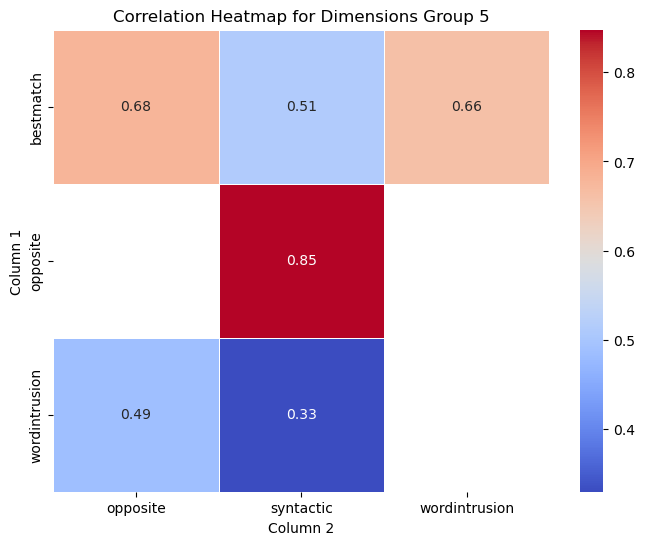

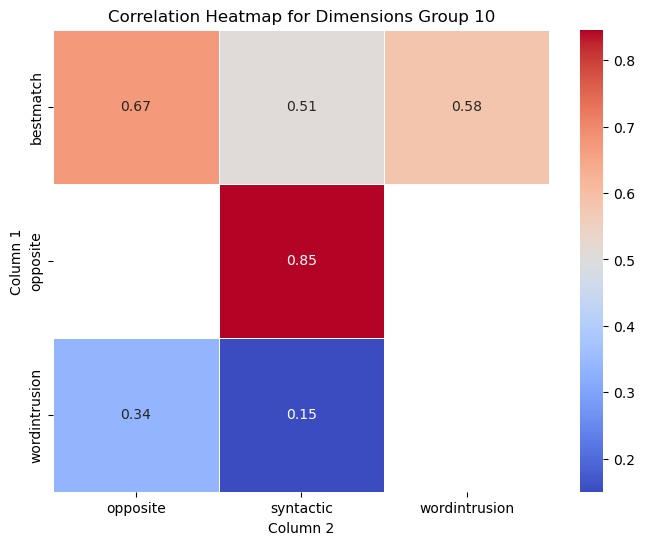

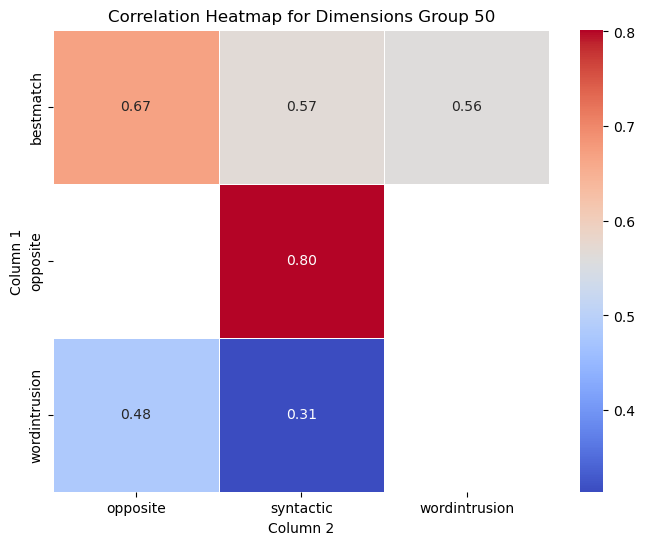

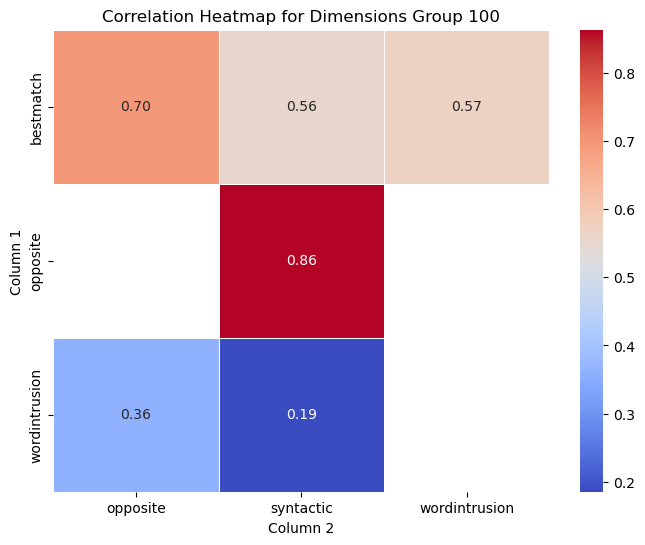

In [33]:
# Group the pivot_df by the "dimensions" column
grouped = pivot_df.groupby("mincount")

# Create a separate heatmap for each group
for group_name, group_df in grouped:
    correlation_results = []

    for i in range(len(columns_to_check)):
        for j in range(i + 1, len(columns_to_check)):
            col1 = columns_to_check[i]
            col2 = columns_to_check[j]
            correlation, p_value = pearsonr(group_df[col1], group_df[col2])
            correlation_results.append({
                "Column 1": col1,
                "Column 2": col2,
                "Correlation": correlation,
                "Significance": p_value
            })

    result_df = pd.DataFrame(correlation_results)

    # Create a pivot table for the heatmap
    pivot_table = result_df.pivot(index="Column 1", columns="Column 2", values="Correlation")

    # Create a heatmap for the current group
    plt.figure(figsize=(8, 6))
    sns.heatmap(pivot_table, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title(f"Correlation Heatmap for Dimensions Group {group_name}")
    plt.show()
